In [12]:
from collections import defaultdict

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from numpy import random

random.seed(0)

In [15]:
def initialize_grid():
    forest = random.choice([GRASS, SPARSE_FOREST, DENSE_FOREST], (GRID_SIZE, GRID_SIZE))
    # Randomly set some cells on fire
    for _ in range(random.randint(1, 5)):
        forest[random.randint(0, GRID_SIZE - 1), random.randint(0, GRID_SIZE - 1)] = BURNING
    return forest


def apply_transition_rules(forest):
    new_forest = forest.copy()
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if forest[i, j] in [GRASS, SPARSE_FOREST, DENSE_FOREST] and is_neighbor_on_fire(forest, i, j) and random.random() < 0.66:
                new_forest[i, j] = BURNING
            elif forest[i, j] == BURNING and random.random() < 0.5:
                new_forest[i, j] = BURNED_GROUND
            elif forest[i, j] == BURNED_GROUND and random.random() < 0.25:
                new_forest[i, j] = GRASS
            elif forest[i, j] == GRASS and random.random() < 0.1:
                new_forest[i, j] = SPARSE_FOREST
            elif forest[i, j] == SPARSE_FOREST and random.random() < 0.05:
                new_forest[i, j] = DENSE_FOREST
    return new_forest


def is_neighbor_on_fire(forest, x, y):
    for i in range(max(0, x - 1), min(GRID_SIZE, x + 2)):
        for j in range(max(0, y - 1), min(GRID_SIZE, y + 2)):
            if forest[i, j] == BURNING:
                return True
    return False


def plot_forest(forest):
    color_map = mcolors.ListedColormap(list(state_to_color.values()))
    plt.figure(figsize=(6, 6))
    plt.pcolor(forest, cmap=color_map, edgecolors='k', linewidths=0.5)
    plt.axis('off')
    plt.show()


def plot_statistics(statistics):
    plt.figure(figsize=(10, 6))
    for state, counts in statistics.items():
        plt.plot(counts, label=state)
    plt.xlabel('Time Step')
    plt.ylabel('Count')
    plt.title('Forest Fire Statistics Over Time')
    plt.legend()
    plt.show()


def simulate_forest_fire():
    statistics = defaultdict(list)
    forest = initialize_grid()
    plot_forest(forest)
    for _ in range(N_STEPS):
        forest = apply_transition_rules(forest)
        for state_name, state in FOREST_STATES.items():
            statistics[state_name].append(np.sum(forest == state))
        plot_forest(forest)
    plot_statistics(statistics)

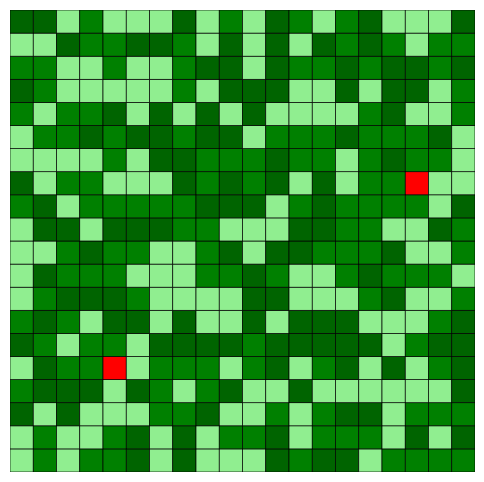

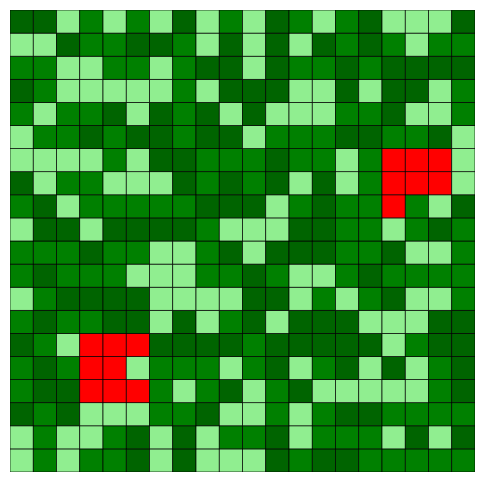

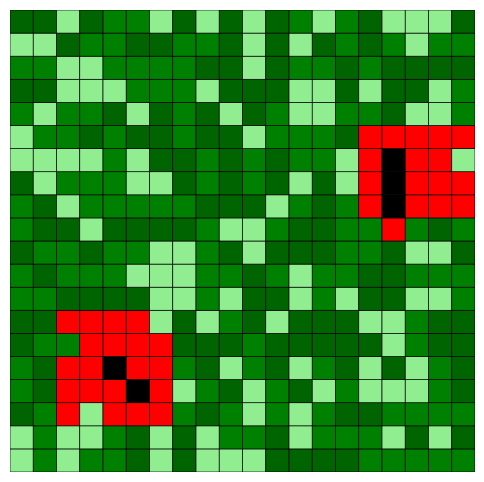

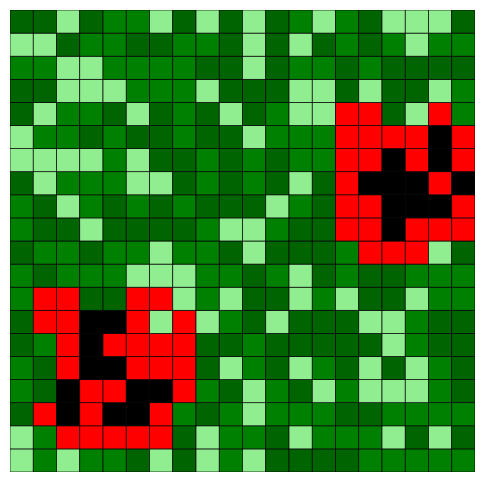

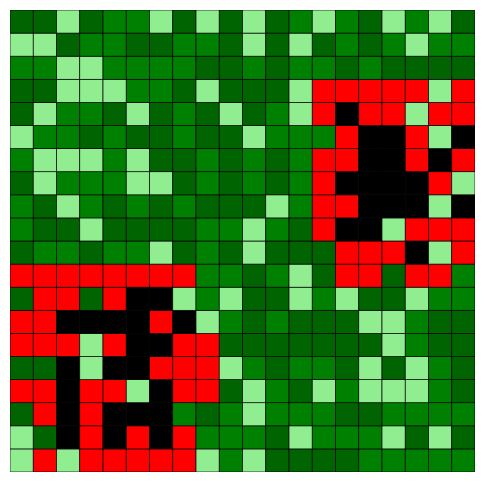

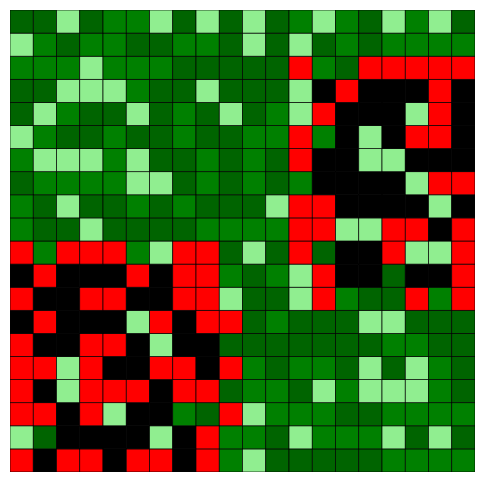

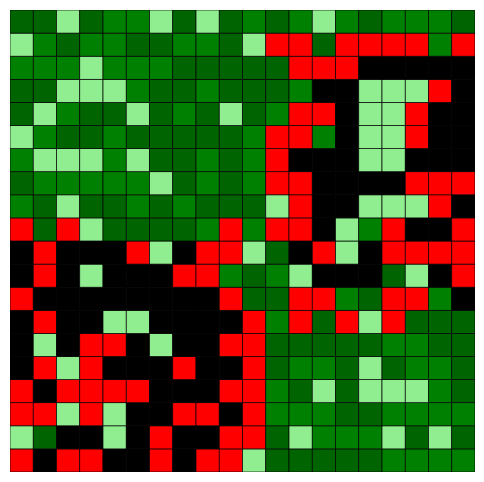

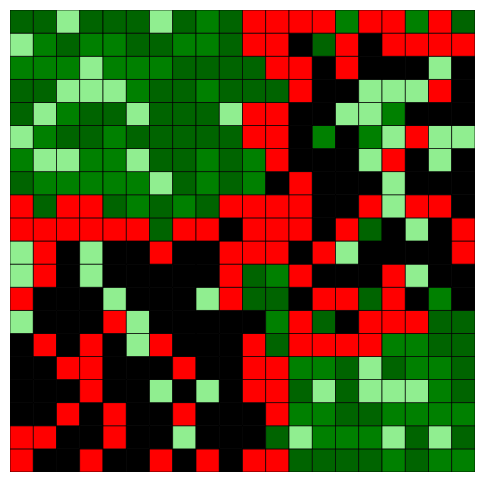

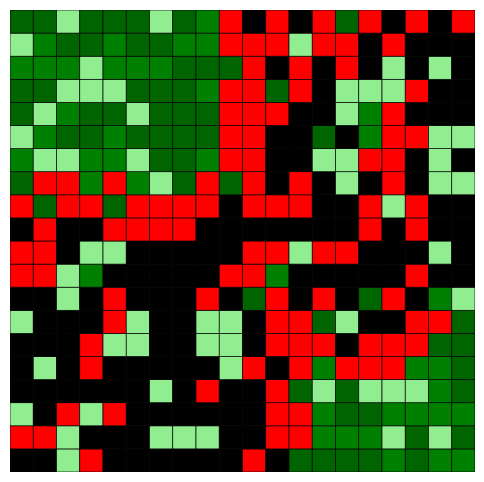

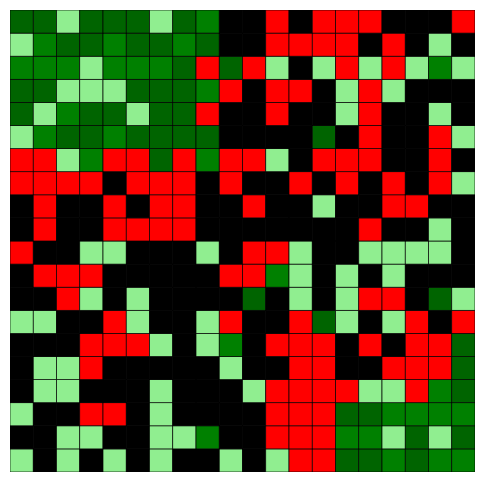

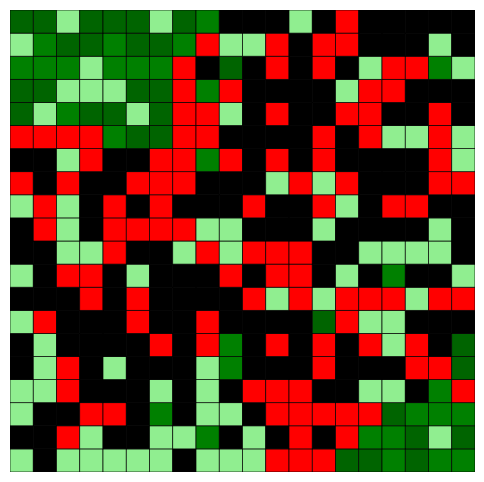

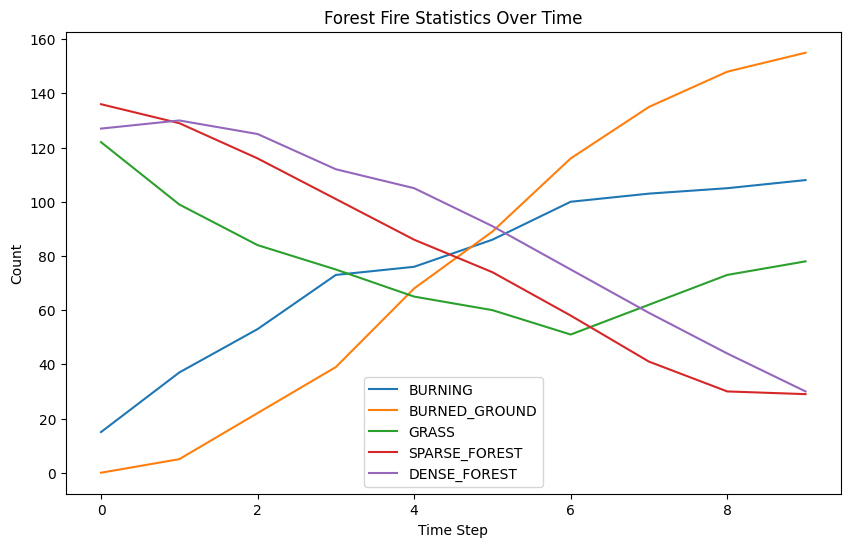

In [14]:
# Forest states
BURNING = 0
BURNED_GROUND = 1
GRASS = 2
SPARSE_FOREST = 3
DENSE_FOREST = 4

FOREST_STATES = {
    'BURNING': BURNING,
    'BURNED_GROUND': BURNED_GROUND,
    'GRASS': GRASS,
    'SPARSE_FOREST': SPARSE_FOREST,
    'DENSE_FOREST': DENSE_FOREST
}

state_to_color = {
    BURNING: 'red',
    BURNED_GROUND: 'black',
    GRASS: 'lightgreen',
    SPARSE_FOREST: 'green',
    DENSE_FOREST: 'darkgreen'
}

# Size of the forest
GRID_SIZE = 20
# Number of simulation steps
N_STEPS = 10

simulate_forest_fire()